In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("real_estate_main.csv")

In [4]:
df = df[['Price','total_area']]

In [5]:
df

,Price,total_area
0,85000000,4000.000000
1,26500000,2699.949058
2,29500000,1935.060676
3,12100000,1200.039671
4,25000000,800.000000
...,...,...
2340,6500000,1650.165017
2341,15500000,2099.986452
2342,4200000,810.028930
2343,20000000,1699.957501


- we have delhi ncr property data with 2 columns only since its simple linear regression, "total_area" is in sqft & price is price of the property
- we need to apply simple linear regression on this data by following all the steps from begining to end 

## preprocessing

- there are 88 null values in total_area
- its shows 110 duplicated rows but they seems to be genuine

In [6]:
df.shape

(2345, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       2345 non-null   int64  
 1   total_area  2257 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 36.8 KB


In [8]:
df.isnull().sum()

Price          0
total_area    88
dtype: int64

In [9]:
df.duplicated().sum()

110

In [10]:
df[df.duplicated()]

,Price,total_area
317,22500000,1800.000000
414,1800000,450.000000
488,36500000,2699.903839
593,75000000,4499.910002
667,7000000,NaN
...,...,...
2337,14800000,1800.048650
2338,14500000,1700.082073
2339,8500000,1350.063532
2343,20000000,1699.957501


In [11]:
pd.options.display.float_format = '{:.2f}'.format      ##display the numbers in their full format
df.describe()

,Price,total_area
count,2345.00,2257.00
mean,20264861.41,2355.77
std,39902171.49,6677.66
min,850000.00,2.71
25%,5200000.00,845.07
50%,10500000.00,1350.06
75%,21500000.00,2249.91
max,900000000.00,190619.86


In [12]:
## dropping null values
# df.dropna(inplace=True)

In [13]:
#imputing missing value uing KNN algorithm

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df['total_area'] = imputer.fit_transform(df[['total_area']])

In [14]:
df.isnull().sum()

Price         0
total_area    0
dtype: int64

In [15]:
df.shape

(2345, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       2345 non-null   int64  
 1   total_area  2345 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 36.8 KB


## eda

- price & total_area has outliers & its positively skewed as per univariate analysis

<Axes: ylabel='Frequency'>

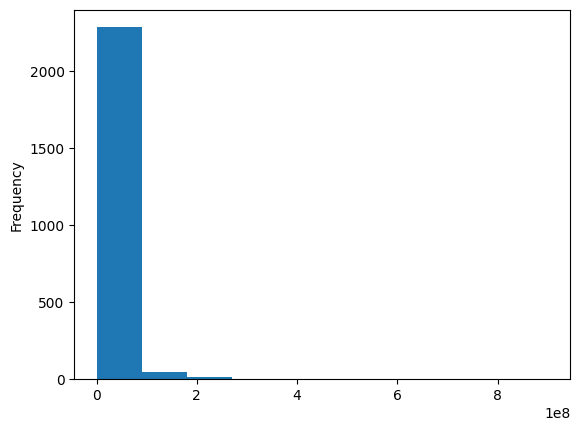

In [17]:
df['Price'].plot(kind='hist')

<Axes: >

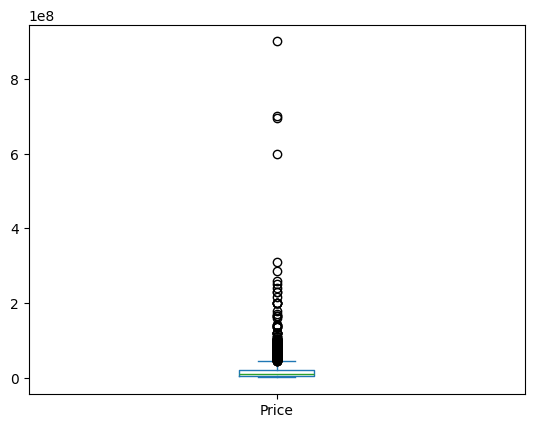

In [18]:
df['Price'].plot(kind='box')

In [19]:
## identofying outlier values

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)][['Price', 'total_area']]

In [20]:
outliers

,Price,total_area
0,85000000,4000.00
8,87500000,8514.99
9,54900000,3600.00
11,71500000,4337.01
13,120000000,6519.97
...,...,...
2272,200000000,26340.05
2289,52500000,2500.00
2306,60000000,4712.91
2308,60000000,4500.11


<Axes: ylabel='Density'>

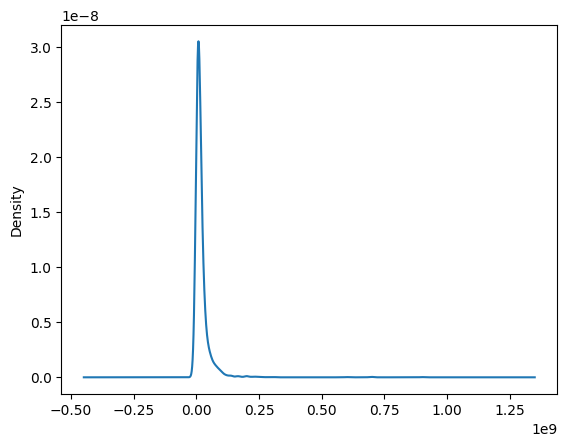

In [21]:
df['Price'].plot(kind='kde')

In [22]:
df['Price'].skew()

11.380582088522239

<Axes: ylabel='Frequency'>

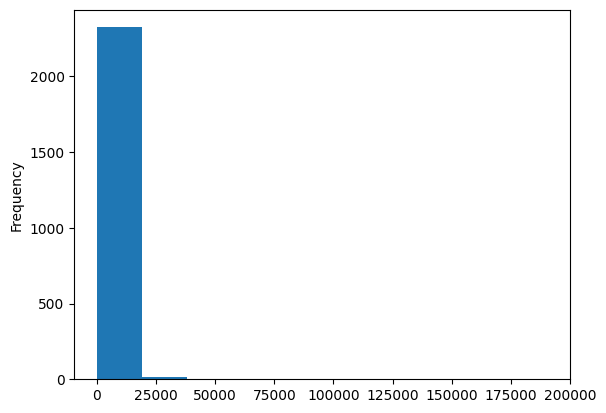

In [23]:
df['total_area'].plot(kind='hist')

<Axes: >

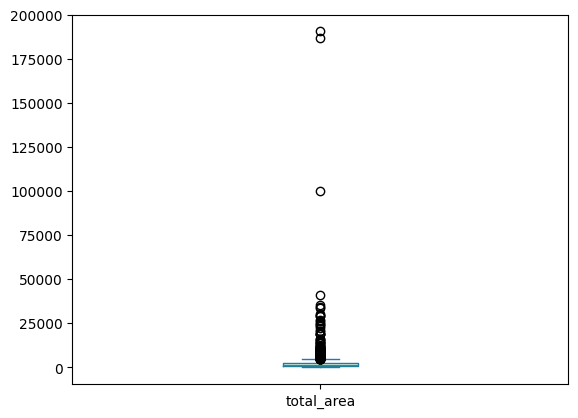

In [24]:
df['total_area'].plot(kind='box')

<Axes: ylabel='Density'>

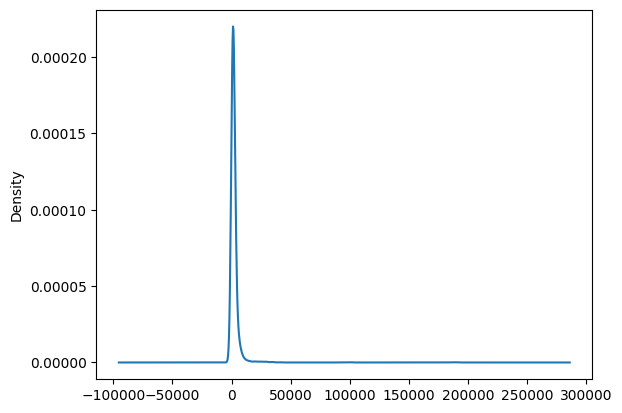

In [25]:
df['total_area'].plot(kind='kde')

In [26]:
df['total_area'].skew()

21.64401242811969

<Axes: xlabel='Price', ylabel='total_area'>

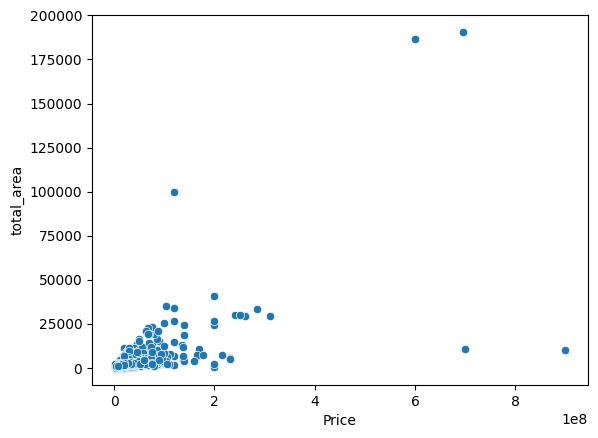

In [27]:
# y-axis (y) represents the dependent variable or target feature.
sns.scatterplot(data=df, x='Price',y='total_area')

In [28]:
df.corr()

,Price,total_area
Price,1.00,0.64
total_area,0.64,1.00


<Axes: >

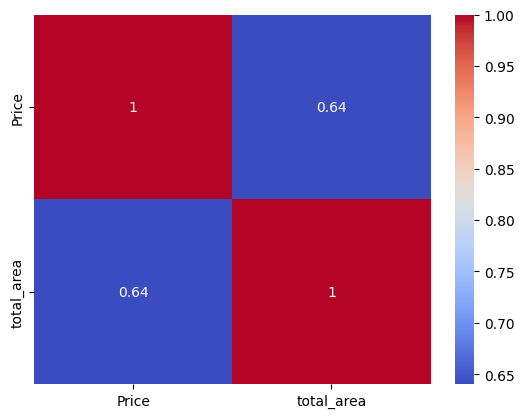

In [29]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

In [30]:
#they seems to be highly corelated

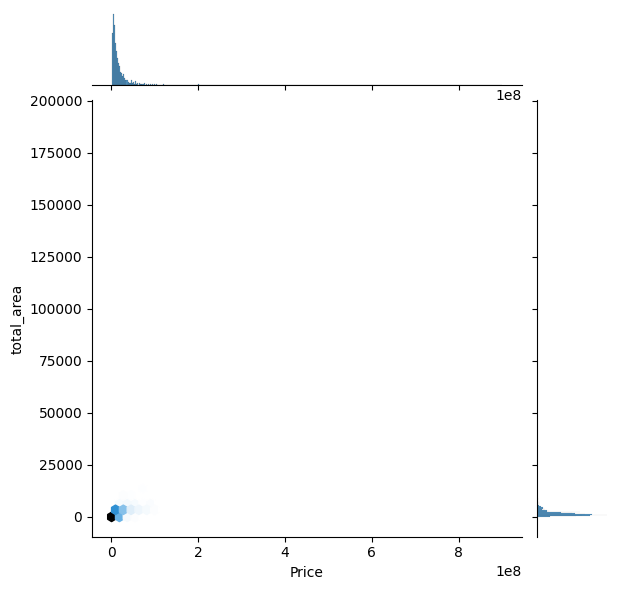

In [31]:
sns.jointplot(data=df, x='Price', y='total_area', kind='hex')

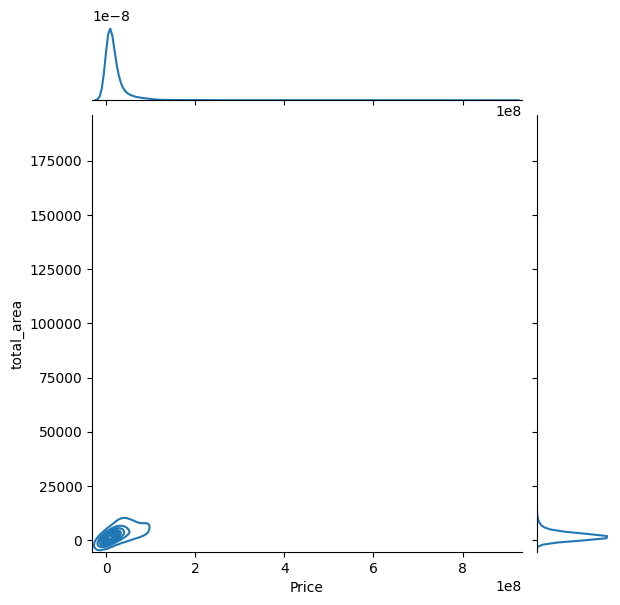

In [32]:
sns.jointplot(data=df, x='Price', y='total_area', kind='kde')

## checking if cols are normally distributed

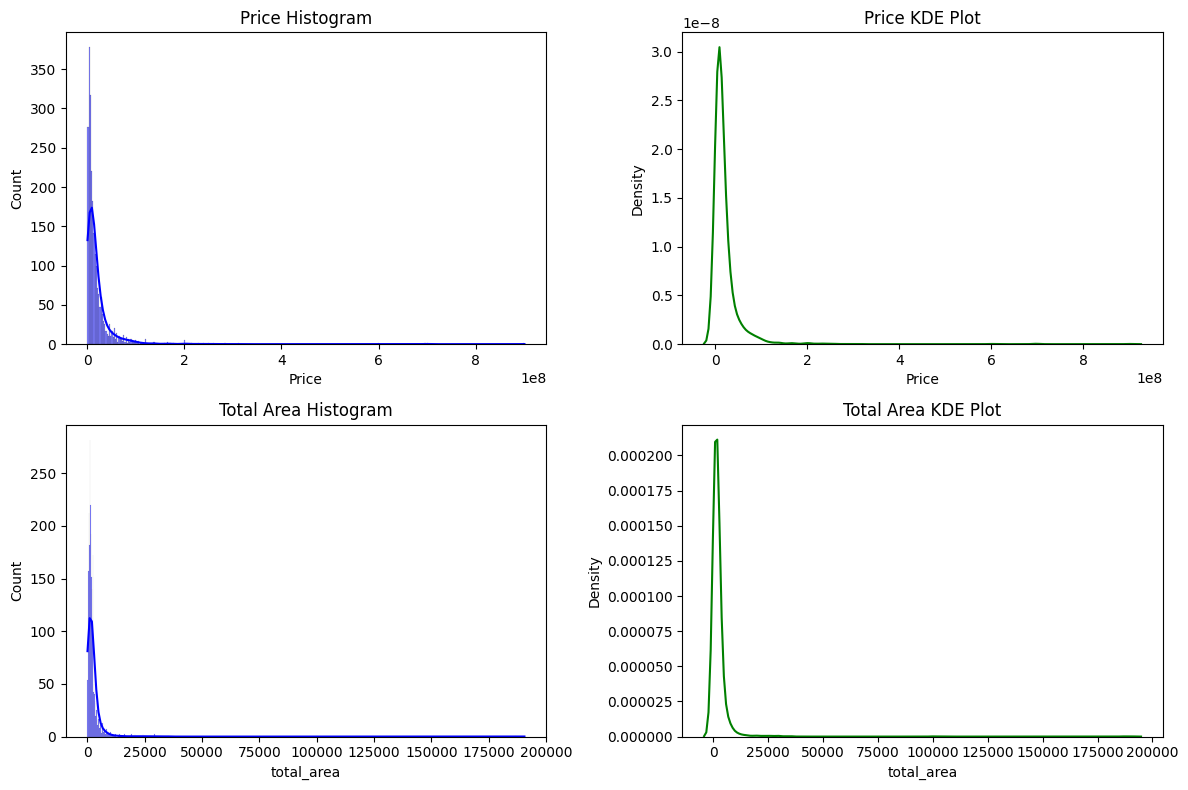

In [33]:
from scipy import stats

# graph size
plt.figure(figsize=(12, 8))

Price = df['Price']
total_area = df['total_area']

# Histogram and KDE plot for Price
plt.subplot(2, 2, 1)
sns.histplot(Price, kde=True, color='blue', label='Price')
plt.title('Price Histogram')

plt.subplot(2, 2, 2)
sns.kdeplot(Price, color='green', label='Price')
plt.title('Price KDE Plot')

# Histogram and KDE plot for total_area
plt.subplot(2, 2, 3)
sns.histplot(total_area, kde=True, color='blue', label='Total Area')
plt.title('Total Area Histogram')

plt.subplot(2, 2, 4)
sns.kdeplot(total_area, color='green', label='Total Area')
plt.title('Total Area KDE Plot')

plt.tight_layout()
plt.show()

In [34]:
# print("Shapiro-Wilk test for normality (Price):", stats.shapiro(Price))
# print("Shapiro-Wilk test for normality (Total Area):", stats.shapiro(total_area))
# print("Kolmogorov-Smirnov test for normality (Price):", stats.kstest(Price, 'norm'))
# print("Kolmogorov-Smirnov test for normality (Total Area):", stats.kstest(total_area, 'norm'))
# print("Anderson-Darling test for normality (Price):", stats.anderson(Price, dist='norm'))
# print("Anderson-Darling test for normality (Total Area):", stats.anderson(total_area, dist='norm'))

## transforming data into normal distribution

In [35]:
from sklearn.preprocessing import PowerTransformer

***Box-Cox Transformation***: This method works well when the data is strictly positive. It requires that the input data is positive, and it can handle zero values by adding a small constant to the data. It assumes homoscedasticity (constant variance) and requires the data to be approximately normally distributed.

***Yeo-Johnson Transformation***: This method is an extension of the Box-Cox transformation and works with both positive and negative values. It also handles zero values by applying a transformation that accounts for them. Like Box-Cox, it assumes homoscedasticity and requires the data to be approximately normally distributed.

***Logarithmic Transformation***: This method is suitable for data that grows exponentially or is positively skewed. It can handle zero and negative values by transforming them into negative infinity, which may not be appropriate for all datasets. Logarithmic transformation may not perform as well as Box-Cox or Yeo-Johnson transformations for non-exponential distributions.

In [36]:
# Box-Cox Transformation
# pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
# df['Price_boxcox'] = pt_boxcox.fit_transform(df[['Price']])
# df['total_area_boxcox'] = pt_boxcox.fit_transform(df[['total_area']])

In [37]:
# Yeo-Johnson Transformation
pt_yeojohnson = PowerTransformer(method='yeo-johnson', standardize=False)
df['Price_yeojohnson'] = pt_yeojohnson.fit_transform(df[['Price']])
df['total_area_yeojohnson'] = pt_yeojohnson.fit_transform(df[['total_area']])

In [38]:
# Log Transformation
# df['Price_log'] = np.log(df['Price'])
# df['total_area_log'] = np.log(df['total_area'])

In [39]:
df

,Price,total_area,Price_yeojohnson,total_area_yeojohnson
0,85000000,4000.00,6.88,7.51
1,26500000,2699.95,6.77,7.19
2,29500000,1935.06,6.78,6.91
3,12100000,1200.04,6.68,6.51
4,25000000,800.00,6.76,6.17
...,...,...,...,...
2340,6500000,1650.17,6.61,6.78
2341,15500000,2099.99,6.71,6.98
2342,4200000,810.03,6.55,6.18
2343,20000000,1699.96,6.74,6.80


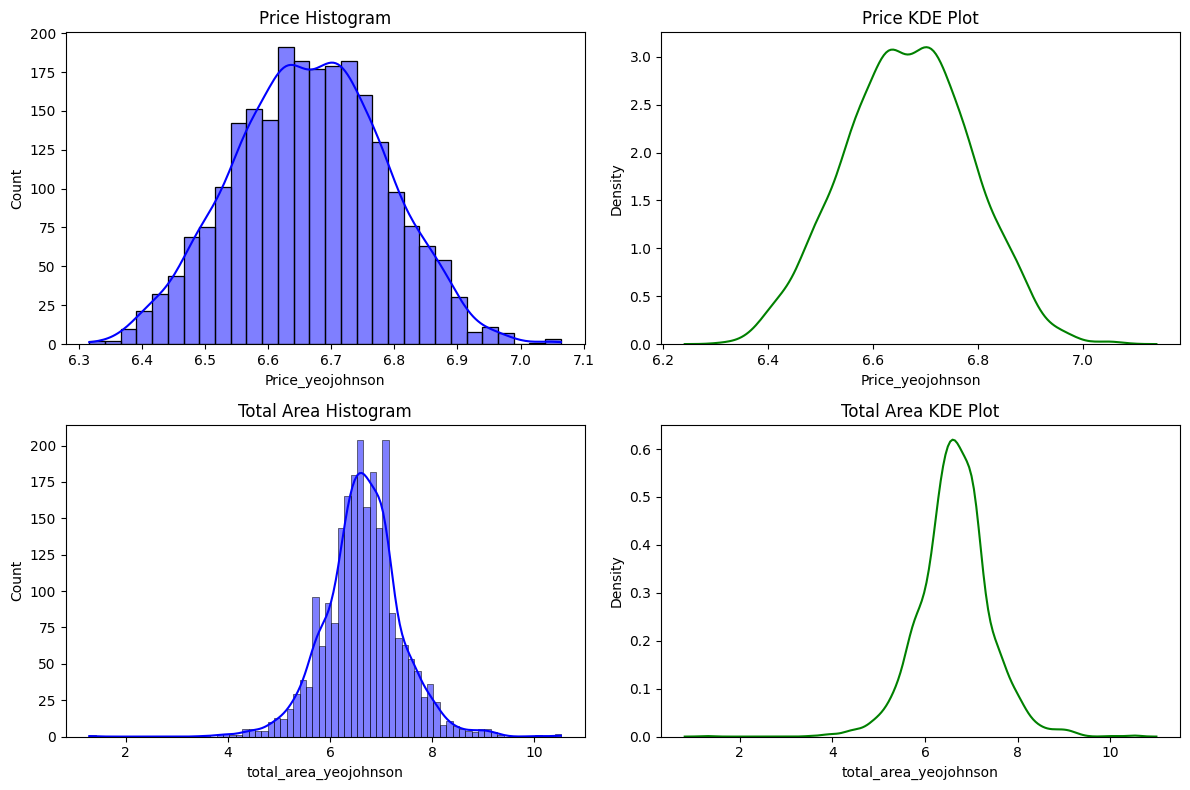

In [40]:
from scipy import stats

# graph size
plt.figure(figsize=(12, 8))

Price = df['Price_yeojohnson']
total_area = df['total_area_yeojohnson']

# Histogram and KDE plot for Price
plt.subplot(2, 2, 1)
sns.histplot(Price, kde=True, color='blue', label='Price')
plt.title('Price Histogram')

plt.subplot(2, 2, 2)
sns.kdeplot(Price, color='green', label='Price')
plt.title('Price KDE Plot')

# Histogram and KDE plot for total_area
plt.subplot(2, 2, 3)
sns.histplot(total_area, kde=True, color='blue', label='Total Area')
plt.title('Total Area Histogram')

plt.subplot(2, 2, 4)
sns.kdeplot(total_area, color='green', label='Total Area')
plt.title('Total Area KDE Plot')

plt.tight_layout()
plt.show()

In [41]:
## now data looks like normally distributed

## we can perform 2 iteration of EDA now since data is now all cleaned

- Price still has some outliers

<Axes: ylabel='Frequency'>

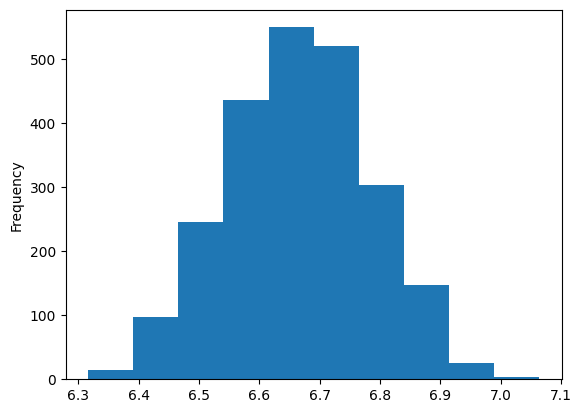

In [42]:
df['Price_yeojohnson'].plot(kind='hist')

<Axes: >

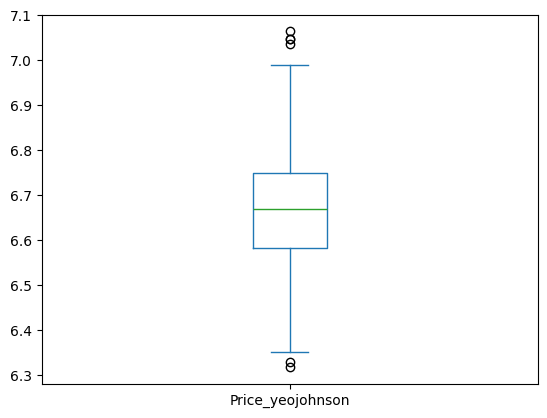

In [43]:
df['Price_yeojohnson'].plot(kind='box')

In [44]:
## identofying outlier values

Q1 = df['Price_yeojohnson'].quantile(0.25)
Q3 = df['Price_yeojohnson'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price_yeojohnson'] < lower_bound) | (df['Price_yeojohnson'] > upper_bound)][['Price_yeojohnson', 'total_area_yeojohnson']]

In [45]:
outliers

,Price_yeojohnson,total_area_yeojohnson
743,7.05,8.30
762,7.05,10.52
1182,7.06,8.25
1304,6.33,5.08
1869,7.04,10.50
2215,6.32,7.07


<Axes: ylabel='Density'>

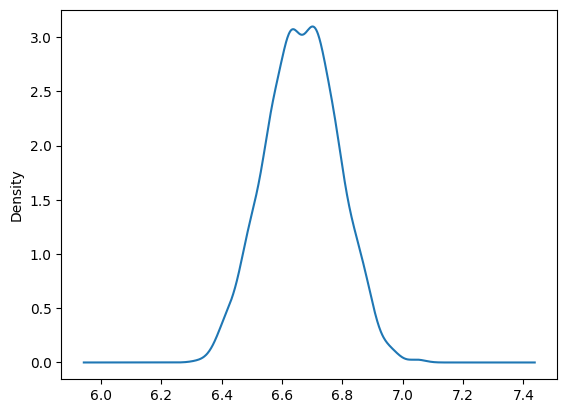

In [46]:
df['Price_yeojohnson'].plot(kind='kde')

In [47]:
df['Price_yeojohnson'].skew()

0.012173050312278192

In [48]:
##skewness is gone after normal distribution transformation

<Axes: ylabel='Frequency'>

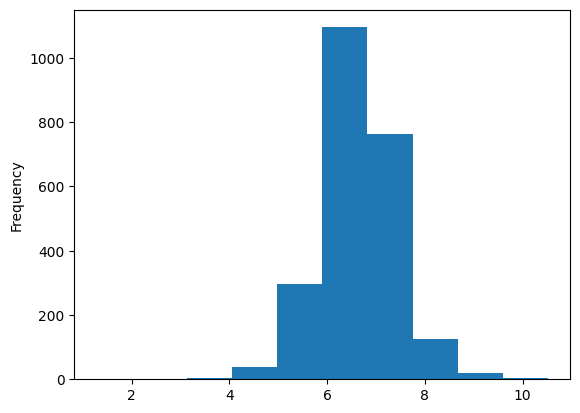

In [49]:
df['total_area_yeojohnson'].plot(kind='hist')

<Axes: >

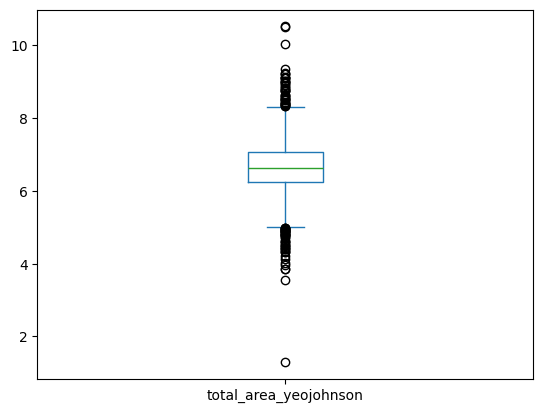

In [50]:
df['total_area_yeojohnson'].plot(kind='box')

In [51]:
## identofying outlier values

Q1 = df['total_area_yeojohnson'].quantile(0.25)
Q3 = df['total_area_yeojohnson'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_area_yeojohnson'] < lower_bound) | (df['total_area_yeojohnson'] > upper_bound)][['Price_yeojohnson', 'total_area_yeojohnson']]

In [52]:
outliers

,Price_yeojohnson,total_area_yeojohnson
70,6.51,4.01
71,6.96,8.95
105,6.92,8.45
177,6.82,8.49
178,6.50,4.34
...,...,...
2133,6.38,4.90
2137,6.51,4.73
2139,6.86,8.75
2193,6.44,3.87


In [53]:
##there seems to be lot of outliers in total_area

<Axes: ylabel='Density'>

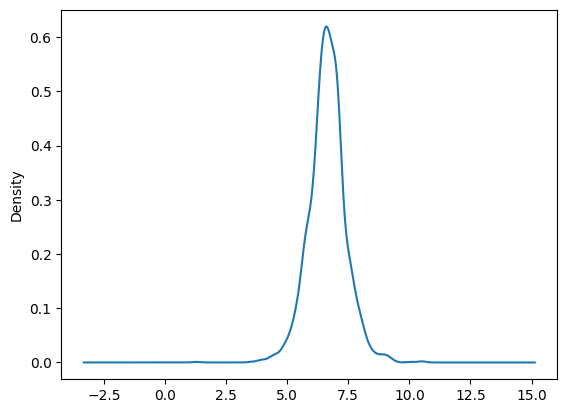

In [54]:
df['total_area_yeojohnson'].plot(kind='kde')

In [55]:
df['total_area_yeojohnson'].skew()

-0.018373455123289723

In [56]:
##it has some skewness

### we can proceed with model building keeping in mind that there are outliers in price & total area so we can use adjusted r2 score, null values are filled using KNN imputer

In [57]:
X = df['total_area_yeojohnson'].values
y = df['Price_yeojohnson'].values

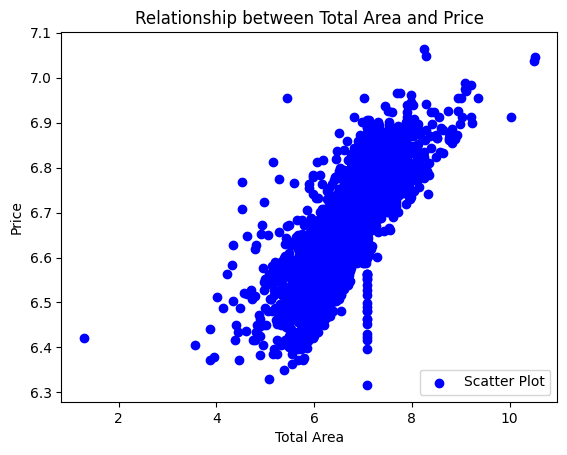

In [58]:
plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Total Area and Price')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.legend(loc=4)
plt.show()

In [59]:
print(X.shape)
print(y.shape)

(2345,)
(2345,)


In [60]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [61]:
print(X.shape)
print(y.shape)

(2345, 1)
(2345, 1)


## dividing data into 2 parts for training & testing

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1571, 1)
(1571, 1)
(774, 1)
(774, 1)


## model training

In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model using training data sets
lm.fit(X_train,y_train)

LinearRegression()

In [76]:
# Make predictions using the transformed input data
y_pred_transformed = lm.predict(X_test)

# Inverse transform the predictions to get them back to the original space
y_pred_original = pt_yeojohnson.inverse_transform(y_pred_transformed)

# Now y_pred_original contains the predictions in the original, untransformed space

C:\Users\Prashant Jain\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [77]:
y_pred_original

array([[1721.36554057],
       [1461.49883826],
       [1445.15126906],
       [1427.92789226],
       [1397.19238724],
       [1403.66385998],
       [1220.24451632],
       [1743.11780494],
       [1478.43439237],
       [1422.5237373 ],
       [1395.11651498],
       [1475.47588966],
       [1463.27478336],
       [1384.5651851 ],
       [1536.28455795],
       [1472.38387053],
       [1540.43492994],
       [1737.20956993],
       [1583.23225602],
       [1168.2439215 ],
       [1524.04264089],
       [1420.78641411],
       [1518.5280214 ],
       [1408.20408302],
       [1212.00686489],
       [1663.49743612],
       [1449.36063809],
       [1662.44536947],
       [1517.44794829],
       [1129.25487518],
       [1425.23230241],
       [1488.59547503],
       [1362.00113939],
       [1823.11816187],
       [1208.36604139],
       [1485.73255877],
       [1546.9836002 ],
       [1438.95058121],
       [1470.25972162],
       [1786.897089  ],
       [1410.41759696],
       [1301.076

In [67]:
# Predict on the test data
y_pred=lm.predict(X_test)

## Regression metrics for model performance

In [68]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 0.0715


In [69]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]

print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("Adjusted R2 Score value: {:.4f}".format(adjusted_r2))

R2 Score value: 0.6432
Adjusted R2 Score value: 0.6427


In business decisions, the benchmark for the R2 score value is 0.7. It means if R2 score value >= 0.7, then the model is good enough to deploy on unseen data whereas if R2 score value < 0.7, then the model is not good enough to deploy. 

In [70]:
print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))
print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.5710
Test set score: 0.6432


## strategies to impliment to improve r2 score

1. Check Linearity Assumption: Ensure that the relationship between your independent variable(s) and the dependent variable is indeed linear. You can do this by visualizing scatter plots of your variables and the fitted regression line.

2. Check Homoscedasticity: Make sure that the residuals (the differences between the observed and predicted values) are evenly spread across the range of predicted values. If there's a pattern in the residuals, such as heteroscedasticity, it indicates that the model's assumptions might not hold, and you may need to transform your data or use a different model.

3. Check Normality of Residuals: Examine the distribution of residuals to ensure they are approximately normally distributed. Deviations from normality could indicate that the model is not capturing all the underlying patterns in the data.

4. Feature Selection: If you have multiple features, consider selecting the most relevant ones based on domain knowledge or feature importance analysis. Simplifying the model by focusing on the most important features can often improve its interpretability and generalization performance.

5. Regularization: Although simple linear regression doesn't have parameters to tune like Ridge or Lasso regression, you can still apply some form of regularization by removing features with low coefficients or high p-values.

6. Transformations: Explore transformations of your variables to better capture non-linear relationships. This could involve polynomial transformations or other non-linear transformations of the variables.

7. Cross-validation: Use cross-validation techniques to assess the stability and generalization performance of your model. This helps ensure that your model's performance is not overly influenced by the specific train-test split of your data.

8. Residual Analysis: Conduct thorough analysis of residuals to identify any patterns or outliers that might indicate areas for improvement in your model.

9. Validation: Validate your model's performance on unseen data to ensure that it generalizes well to new observations. This helps guard against overfitting and provides a more accurate assessment of your model's true performance.

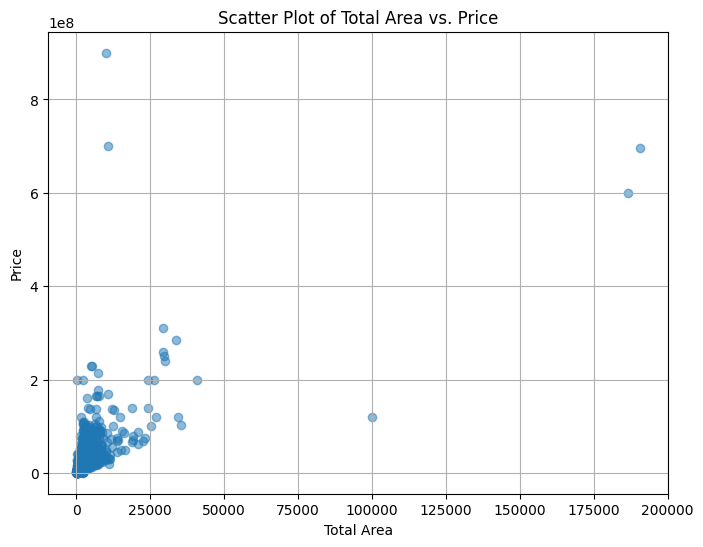

In [72]:
## check linearity assumption

import matplotlib.pyplot as plt

# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['total_area'], df['Price'], alpha=0.5)
plt.title('Scatter Plot of Total Area vs. Price')
plt.xlabel('Total Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [73]:
#It looks like relation is somewhat linear

In [75]:
## checking homoscedasticity

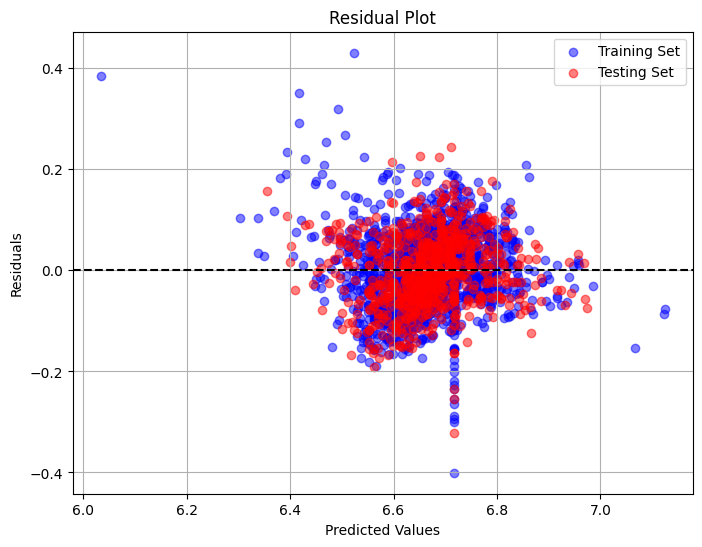

In [80]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit the linear regression model
lm = LinearRegression()
lm.fit(X_train.reshape(-1, 1), y_train)

# Make predictions for training set
y_train_pred = lm.predict(X_train.reshape(-1, 1))

# Calculate residuals for training set
train_residuals = y_train - y_train_pred

# Make predictions for testing set
y_test_pred = lm.predict(X_test.reshape(-1, 1))

# Calculate residuals for testing set
test_residuals = y_test - y_test_pred

# Plot residuals against predicted values for training set
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_residuals, alpha=0.5, color='blue', label='Training Set')
plt.scatter(y_test_pred, test_residuals, alpha=0.5, color='red', label='Testing Set')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')  # Add horizontal line at y=0 for reference
plt.legend()
plt.grid(True)
plt.show()

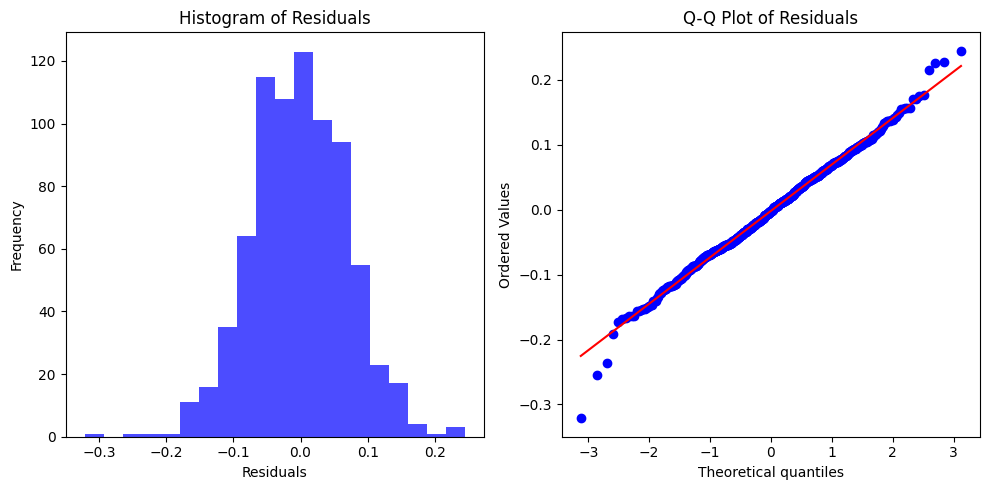

Shapiro-Wilk test:
Test Statistic: 0.9955386009170462
p-value: 0.024782092003408824
The residuals do not follow a normal distribution (reject null hypothesis)


In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q plot of residuals
plt.subplot(1, 2, 2)
stats.probplot(residuals.flatten(), dist="norm", plot=plt)  # Flatten the residuals to 1D array
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(residuals)
print("Shapiro-Wilk test:")
print("Test Statistic:", stat)
print("p-value:", p_value)
if p_value < 0.05:
    print("The residuals do not follow a normal distribution (reject null hypothesis)")
else:
    print("The residuals follow a normal distribution (fail to reject null hypothesis)")

In [83]:
## since residual is not normally distributed it means model is not capturing all the underlying patterns in the data.

In [84]:
## crossvalidation

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lm = LinearRegression()

# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this value based on your preference

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(lm, df[['total_area']], df['Price'], cv=kf, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.41031301 0.43003251 0.29592256 0.54478835 0.47454909]
Mean Cross-Validation Score: 0.43112110433640594


The mean cross-validation score of approximately 0.431 suggests that the model's performance, as evaluated by the 
𝑅2 metric, is around 43.1%. This means that the model explains about 43.1% of the variance in the target variable (Price) on average across different folds of the cross-validation.

## Issues I can think of right now!!

1. There are outliers in total_area, we can remove & try model performance again & see the changes
2. Since relation is not linear, we can apply Polynomial Regression
3. total_area missing values were imputed using KNN, there are imputation techniques or try model performance after dropping missing values